<a href="https://colab.research.google.com/github/fzkhouy/Digits_Classification/blob/main/Digits_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification des digits avec KNN, validation croisee , Grid search**



**charger la base de donnees MNIST**

In [ ]:
from sklearn import datasets
#load the MNIST digits datasets 
mnist = datasets.load_digits()

**selection et separation des donnees**



In [ ]:
mnist.data.shape

(1797, 64)

Nombre d'image : 1797

taille de chaque image : 64

In [ ]:
print(mnist)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0

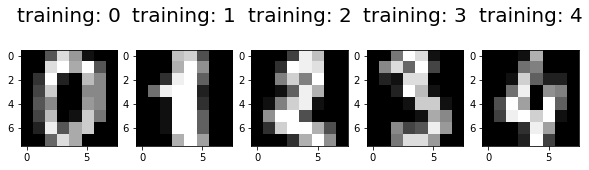

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize = (10,4))
for index, (image, label) in enumerate(zip(mnist.data[0:5], mnist.target[0:5])):
  plt.subplot(1, 5, index +1)
  plt.imshow(np.reshape(image, (8,8)), cmap = plt.cm.gray)
  plt.title('training: %i\n' %label, fontsize =20)

In [ ]:
from sklearn.model_selection import train_test_split
#75% for training and 25% for testing 
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(mnist.data), mnist.target, test_size = 0.25)
#10% for validation 
(trainData, valData, trainLabels, valLabels) = train_test_split(np.array(trainData), trainLabels, test_size = 0.1)

In [ ]:
#checking sizes of each data split
print("training data points:{}".format(len(trainLabels)))
print("validation data points:{}".format(len(valLabels)))
print("test data points:{}".format(len(testLabels)))

training data points:1212
validation data points:135
test data points:450


**Entrainement du modele et choix de la valeur k**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#init values of K with thw list of accuracies for each valueof k
kVals = range(1, 10, 2)
accuracies = []

#loop over KVal
for k in kVals:
#train the classifier
  model = KNeighborsClassifier(n_neighbors = k)
  model.fit(trainData,trainLabels)

  #evaluate the model
  score = model.score(valData, valLabels)
  print("k=%d, accuracy=%.2f%%"%(k,score*100))
  accuracies.append(score)

k=1, accuracy=97.78%
k=3, accuracy=99.26%
k=5, accuracy=98.52%
k=7, accuracy=97.78%
k=9, accuracy=97.78%


In [ ]:
#largest accuracy
i=np.argmax(accuracies)
print("k=%d achieved highst accuracy of %.2f%% on validation data"%(kVals[i],accuracies[i]*100))

#re-train the classifier
model=KNeighborsClassifier(n_neighbors=kVals[i])
model.fit(trainData,trainLabels)

#predict classes for the best test set
predictions = model.predict(testData)

k=3 achieved highst accuracy of 99.26% on validation data


In [ ]:
from sklearn.metrics import classification_report
print("EVALUATION ON TESTING DATA")
print(classification_report(testLabels, predictions))

EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       0.95      1.00      0.98        42
           2       1.00      1.00      1.00        47
           3       1.00      0.98      0.99        49
           4       1.00      0.96      0.98        47
           5       1.00      1.00      1.00        42
           6       1.00      1.00      1.00        39
           7       0.98      0.98      0.98        46
           8       1.00      0.98      0.99        53
           9       0.95      1.00      0.98        41

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



utilisation de validation croisee , Grid search de sckit-learn

> Afin d'entraîner et de tester notre modèle en utilisant grid search on prendra un nouveau classificateur k-NN, notre param_grid et une valeur de validation croisée de 5 afin de trouver la valeur optimale pour 'n_neighbors'.


In [ ]:
#importer les bibliotheques necessaire 
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Load the MNIST digits datasets

mnist = datasets.load_digits()
#Split the data
Data_train, Data_test, Labels_train, Labels_test = train_test_split(np.array(mnist.data), mnist.target, test_size=0.25)

In [ ]:
#create a new KNN model
model_1 = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 10)}

#use gridsearch to test all values for n_neighbors
model_gscv = GridSearchCV(model_1, param_grid, cv=5)

#fit model to data
model_gscv.fit(Data_train, Labels_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
#check top performing n_neighbors value
model_gscv.best_params_

{'n_neighbors': 1}

n_neighbors = 2


In [ ]:
#check mean score for the top performing value of n_neighbors
model_gscv.best_score_

0.9866336224700538

In [ ]:
model_gscv.best_estimator_.score(Data_test, Labels_test)

0.9866666666666667

In [ ]:
predictions = model_gscv.predict(Data_test)

print("EVALUATION ON TESTING DATA USING GridSearchCV")
print(classification_report(Labels_test, predictions))

EVALUATION ON TESTING DATA USING GridSearchCV
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       0.96      0.98      0.97        55
           2       1.00      0.97      0.99        36
           3       0.93      1.00      0.97        42
           4       1.00      1.00      1.00        43
           5       0.98      1.00      0.99        46
           6       1.00      1.00      1.00        43
           7       1.00      1.00      1.00        47
           8       1.00      0.95      0.98        43
           9       1.00      0.96      0.98        48

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450

